In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import test_func as tf
%matplotlib inline



In [2]:
files=glob.glob('train/*.csv')
data_list=[]

for file in files:
    data_list.append(pd.read_csv(file,index_col=0))
df=pd.concat(data_list)

C:\Users\fujir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
files=glob.glob('train/*.csv')
data_list=[]

for file in files:
    data_list.append(pd.read_csv(file,index_col=0))
df=pd.concat(data_list)

C:\Users\fujir\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637351 entries, 1060685 to 47003572
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   種類            637351 non-null  object 
 1   地域            0 non-null       float64
 2   市区町村コード       637351 non-null  int64  
 3   都道府県名         637351 non-null  object 
 4   市区町村名         637351 non-null  object 
 5   地区名           637060 non-null  object 
 6   最寄駅：名称        634732 non-null  object 
 7   最寄駅：距離（分）     614306 non-null  object 
 8   間取り           615609 non-null  object 
 9   面積（㎡）         637351 non-null  object 
 10  土地の形状         0 non-null       float64
 11  間口            0 non-null       float64
 12  延床面積（㎡）       0 non-null       float64
 13  建築年           619117 non-null  object 
 14  建物の構造         623423 non-null  object 
 15  用途            591214 non-null  object 
 16  今後の利用目的       275091 non-null  object 
 17  前面道路：方位       0 non-null       float64
 

In [4]:
df=df.drop(['市区町村名'],axis=1)

In [5]:
df=df.drop(['種類'],axis=1)

In [6]:
nonnull_list=[]

for col in df.columns:
    nonnull=df[col].count()
    if nonnull==0:
        nonnull_list.append(col)
        

In [7]:
nonnull_list

['地域', '土地の形状', '間口', '延床面積（㎡）', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）']

In [8]:
df=df.drop(nonnull_list,axis=1)

In [9]:
pd.set_option('display.max_rows',500)
df['最寄駅：距離（分）'].value_counts()

6          50928
4          48883
5          45337
8          44277
3          42880
9          38379
7          32369
30分?60分    31999
10         31572
11         30625
2          27100
13         22934
1          19746
14         18759
15         18552
12         15068
16         14354
18         11651
19         10533
20          8910
21          7163
23          6663
25          6169
24          4884
28          4133
26          3996
0           3704
1H?1H30     3624
29          3587
17          2515
22          1082
2H?          826
1H30?2H      692
27           412
Name: 最寄駅：距離（分）, dtype: int64

In [10]:
dis={
    '30分?60分':45,
    '1H?1H30':75,
    '1H30?2H':105,
    '2H?':120
}

In [11]:
df['最寄駅：距離（分）']=df['最寄駅：距離（分）'].replace(dis).astype(float)

In [12]:
#df['面積（㎡）'].value_counts()

In [13]:
df['面積（㎡）']=df['面積（㎡）'].replace({'2000㎡以上':2000}).astype(float)

In [14]:
df['建築年'].value_counts().keys()[0].split('平成')[1].split('年')

['3', '']

In [15]:
y_list={}
for i in df['建築年'].value_counts().keys():
    if '平成' in i:
        num=float(i.split('平成')[1].split('年')[0])
        year=33-num
    if '令和' in i:
        num=float(i.split('令和')[1].split('年')[0])
        year=3-num 
    if '昭和' in i:
        num=float(i.split('昭和')[1].split('年')[0])
        year=96-num     
    y_list[i]=year
    y_list['戦前']=76
    

In [16]:
df['建築年']=df['建築年'].replace(y_list)

In [17]:
df['取引時点'].value_counts()

2014年第１四半期    13561
2017年第１四半期    13248
2015年第１四半期    13237
2013年第１四半期    13233
2013年第２四半期    13221
2018年第１四半期    13190
2016年第１四半期    13099
2019年第２四半期    13047
2016年第２四半期    13044
2019年第１四半期    12975
2010年第４四半期    12867
2019年第３四半期    12831
2015年第２四半期    12808
2018年第４四半期    12731
2011年第１四半期    12675
2017年第４四半期    12600
2015年第４四半期    12551
2018年第２四半期    12531
2015年第３四半期    12485
2016年第３四半期    12470
2017年第３四半期    12458
2010年第３四半期    12457
2013年第４四半期    12412
2016年第４四半期    12389
2014年第４四半期    12187
2013年第３四半期    12173
2019年第４四半期    12077
2018年第３四半期    11995
2010年第１四半期    11984
2017年第２四半期    11806
2012年第４四半期    11753
2012年第１四半期    11666
2014年第３四半期    11661
2010年第２四半期    11596
2014年第２四半期    11499
2009年第４四半期    11488
2012年第２四半期    11115
2009年第３四半期    10983
2012年第３四半期    10946
2011年第４四半期    10934
2009年第２四半期    10883
2011年第３四半期    10779
2009年第１四半期    10605
2011年第２四半期    10506
2008年第３四半期     9962
2008年第４四半期     9947
2008年第２四半期     9873
2008年第１四半期     9541
2007年第４四半期     9304
2007年第２四半期     9144


In [18]:
df['取引時点']
' 2009年第４四半期'.replace('第４四半期','0.75')

' 2009年0.75'

In [19]:
year={
    '年第１四半期':'.25',
    '年第２四半期':'.50',
    '年第３四半期':'.75',
    '年第４四半期':'.99',
}

In [20]:
df['取引時点'].value_counts().keys()

Index(['2014年第１四半期', '2017年第１四半期', '2015年第１四半期', '2013年第１四半期', '2013年第２四半期',
       '2018年第１四半期', '2016年第１四半期', '2019年第２四半期', '2016年第２四半期', '2019年第１四半期',
       '2010年第４四半期', '2019年第３四半期', '2015年第２四半期', '2018年第４四半期', '2011年第１四半期',
       '2017年第４四半期', '2015年第４四半期', '2018年第２四半期', '2015年第３四半期', '2016年第３四半期',
       '2017年第３四半期', '2010年第３四半期', '2013年第４四半期', '2016年第４四半期', '2014年第４四半期',
       '2013年第３四半期', '2019年第４四半期', '2018年第３四半期', '2010年第１四半期', '2017年第２四半期',
       '2012年第４四半期', '2012年第１四半期', '2014年第３四半期', '2010年第２四半期', '2014年第２四半期',
       '2009年第４四半期', '2012年第２四半期', '2009年第３四半期', '2012年第３四半期', '2011年第４四半期',
       '2009年第２四半期', '2011年第３四半期', '2009年第１四半期', '2011年第２四半期', '2008年第３四半期',
       '2008年第４四半期', '2008年第２四半期', '2008年第１四半期', '2007年第４四半期', '2007年第２四半期',
       '2007年第３四半期', '2007年第１四半期', '2006年第４四半期', '2006年第３四半期', '2006年第２四半期',
       '2006年第１四半期', '2005年第４四半期', '2005年第３四半期'],
      dtype='object')

In [21]:
year_list={}

for i in df['取引時点'].value_counts().keys():
    for k,j in year.items():
        if k in i:
            year_modify=i.replace(k,j)
    year_list[i]=year_modify
df['取引時点']=df['取引時点'].replace(year_list).astype(float)            

In [22]:
df['取引時点'].value_counts()

2014.25    13561
2017.25    13248
2015.25    13237
2013.25    13233
2013.50    13221
2018.25    13190
2016.25    13099
2019.50    13047
2016.50    13044
2019.25    12975
2010.99    12867
2019.75    12831
2015.50    12808
2018.99    12731
2011.25    12675
2017.99    12600
2015.99    12551
2018.50    12531
2015.75    12485
2016.75    12470
2017.75    12458
2010.75    12457
2013.99    12412
2016.99    12389
2014.99    12187
2013.75    12173
2019.99    12077
2018.75    11995
2010.25    11984
2017.50    11806
2012.99    11753
2012.25    11666
2014.75    11661
2010.50    11596
2014.50    11499
2009.99    11488
2012.50    11115
2009.75    10983
2012.75    10946
2011.99    10934
2009.50    10883
2011.75    10779
2009.25    10605
2011.50    10506
2008.75     9962
2008.99     9947
2008.50     9873
2008.25     9541
2007.99     9304
2007.50     9144
2007.75     8914
2007.25     6174
2006.99     5613
2006.75     5395
2006.50     5221
2006.25     4322
2005.99     3650
2005.75     3535
Name: 取引時点, dt

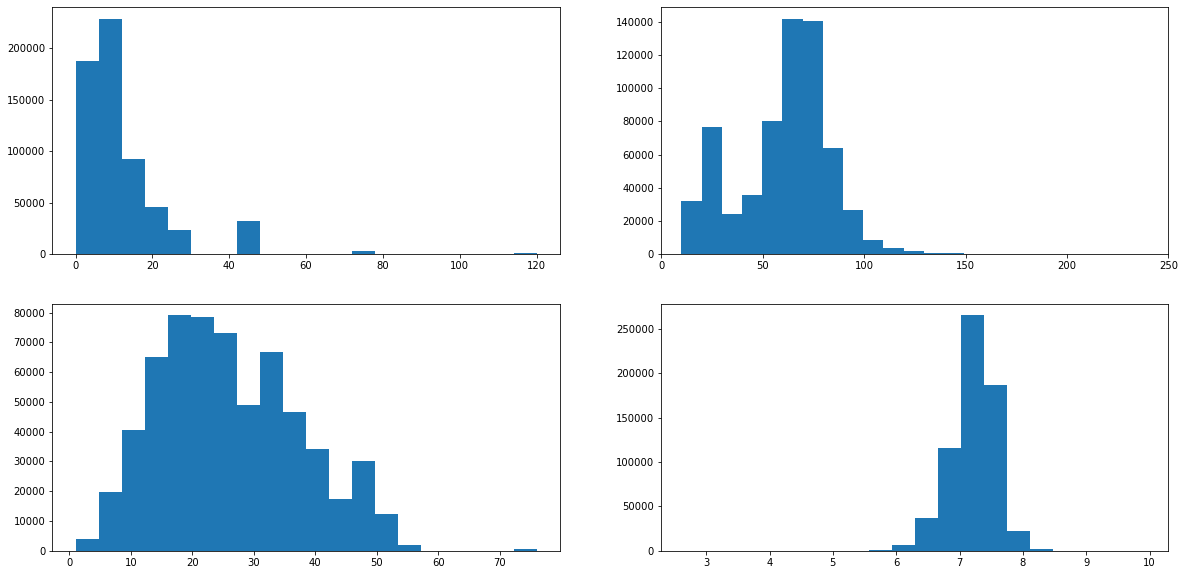

In [23]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
axes[0][0].hist(df['最寄駅：距離（分）'],bins=20)
axes[0][1].hist(df['面積（㎡）'],bins=200)
axes[0][1].set_xlim(0,250)
axes[1][0].hist(df['建築年'],bins=20)
axes[1][1].hist(df['取引価格（総額）_log'],bins=20)
plt.show()

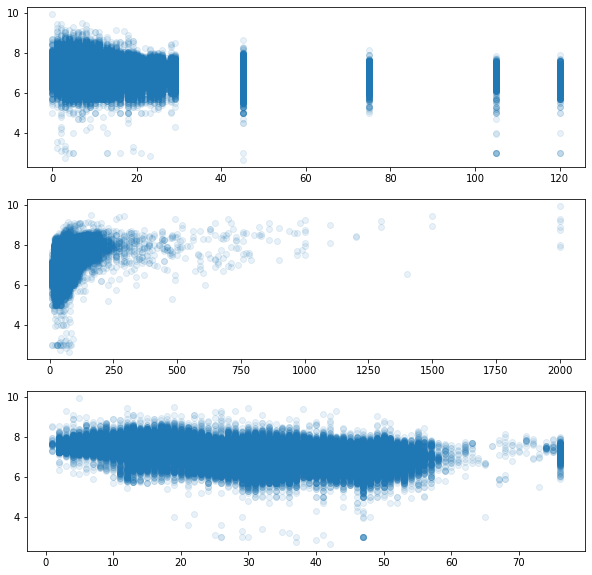

In [24]:
fig,axes=plt.subplots(3,1,figsize=(10,10))
axes[0].scatter(df['最寄駅：距離（分）'],df['取引価格（総額）_log'],alpha=0.1)
axes[1].scatter(df['面積（㎡）'],df['取引価格（総額）_log'],alpha=0.1)
axes[2].scatter(df['建築年'],df['取引価格（総額）_log'],alpha=0.1)
plt.show()

In [25]:
df[['最寄駅：距離（分）','面積（㎡）','建築年','取引価格（総額）_log']].corr()

,最寄駅：距離（分）,面積（㎡）,建築年,取引価格（総額）_log
最寄駅：距離（分）,1.000000,0.151880,0.117809,-0.215520
面積（㎡）,0.151880,1.000000,-0.067415,0.382755
建築年,0.117809,-0.067415,1.000000,-0.538493
取引価格（総額）_log,-0.215520,0.382755,-0.538493,1.000000


<AxesSubplot:>

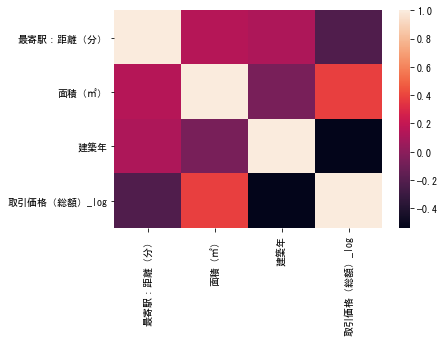

In [26]:
import matplotlib
matplotlib.rcParams["font.family"]="MS Gothic"
sns.heatmap(df[['最寄駅：距離（分）','面積（㎡）','建築年','取引価格（総額）_log']].corr())